In [ ]:
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


2
[-0.5095031   0.00090107] -1.0 False {}
2
[-0.5077078   0.00179538] -1.0 False {}
1
[-0.5060315   0.00167624] -1.0 False {}
1
[-0.504487    0.00154455] -1.0 False {}
2
[-0.5020857   0.00240129] -1.0 False {}
2
[-0.49884564  0.00324005] -1.0 False {}
0
[-0.49679106  0.00205458] -1.0 False {}
0
[-0.49593732  0.00085373] -1.0 False {}
0
[-4.962908e-01 -3.534879e-04] -1.0 False {}
2
[-4.958489e-01  4.419314e-04] -1.0 False {}
0
[-0.49661484 -0.00076595] -1.0 False {}
1
[-0.49758294 -0.00096811] -1.0 False {}
1
[-0.49874598 -0.00116303] -1.0 False {}
0
[-0.50109524 -0.00234926] -1.0 False {}
0
[-0.50461316 -0.0035179 ] -1.0 False {}
2
[-0.5072734  -0.00266022] -1.0 False {}
2
[-0.509056   -0.00178261] -1.0 False {}
2
[-0.5099476  -0.00089165] -1.0 False {}
1
[-0.5109416 -0.000994 ] -1.0 False {}
2
[-5.110305e-01 -8.890818e-05] -1.0 False {}
0
[-0.51221365 -0.00118315] -1.0 False {}
0
[-0.5144822  -0.00226852] -1.0 False {}
1
[-0.51681906 -0.00233689] -1.0 False {}
1
[-0.5192068  -0.002387

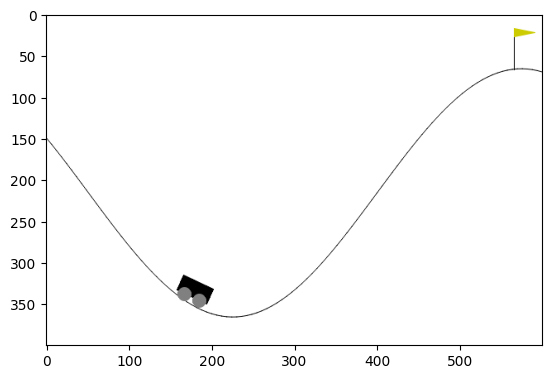

In [ ]:
from numpy.random.mtrand import sample
import gym
import matplotlib.pyplot as plt
#import gymnasium as gym

# Create the environment
env = gym.make('MountainCar-v0')

# Reset the environment
observation = env.reset()

# Create a figure and axis object
fig, ax = plt.subplots()

while True:
  #Render the environment
  ax.imshow(env.render(mode='rgb_array'))
  #choose an action
  action = env.action_space.sample()
  print(action)
  #act upon the selected action
  observation, reward, done, info = env.step(action)
  print(observation, reward, done, info)

  if done:
    break

# Close the environment
env.close()

# Show the plot
plt.show()



Episode: 0, Score: -200.00, Epsilon: 0.99
Episode: 10, Score: -200.00, Epsilon: 0.95
Episode: 20, Score: -200.00, Epsilon: 0.90
Episode: 30, Score: -200.00, Epsilon: 0.86
Episode: 40, Score: -200.00, Epsilon: 0.81
Episode: 50, Score: -200.00, Epsilon: 0.77
Episode: 60, Score: -200.00, Epsilon: 0.74
Episode: 70, Score: -200.00, Epsilon: 0.70
Episode: 80, Score: -200.00, Epsilon: 0.67
Episode: 90, Score: -200.00, Epsilon: 0.63
Episode: 100, Score: -200.00, Epsilon: 0.60
Episode: 110, Score: -200.00, Epsilon: 0.57
Episode: 120, Score: -200.00, Epsilon: 0.55
Episode: 130, Score: -200.00, Epsilon: 0.52
Episode: 140, Score: -200.00, Epsilon: 0.49
Episode: 150, Score: -200.00, Epsilon: 0.47
Episode: 160, Score: -200.00, Epsilon: 0.45
Episode: 170, Score: -200.00, Epsilon: 0.42
Episode: 180, Score: -200.00, Epsilon: 0.40
Episode: 190, Score: -200.00, Epsilon: 0.38
Episode: 200, Score: -200.00, Epsilon: 0.37
Episode: 210, Score: -200.00, Epsilon: 0.35
Episode: 220, Score: -200.00, Epsilon: 0.33

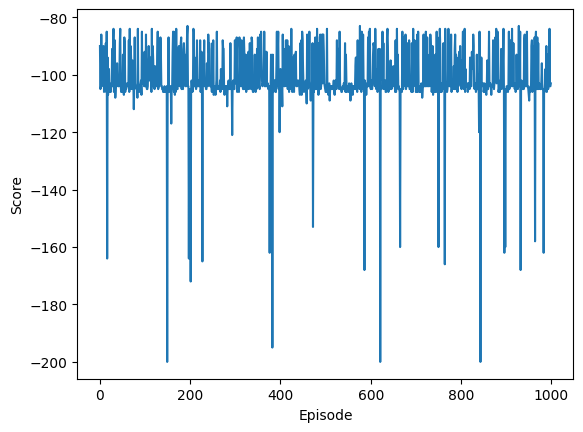

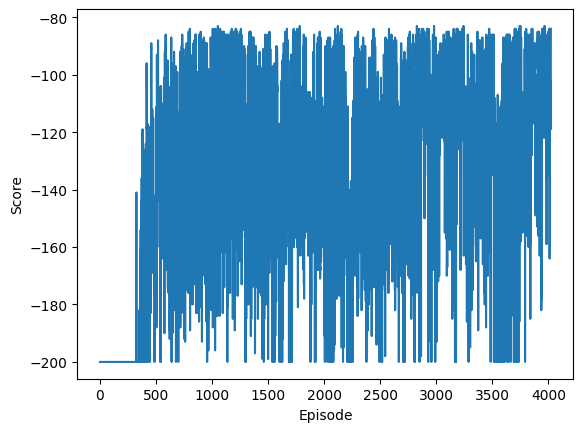

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import gym

# Define the DQN network
class DQNet(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the DQN agent
class DQNAgent:
    def __init__(self, state_dim, action_dim, gamma=0.99, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995, batch_size=64, lr=0.001):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size
        self.lr = lr
        self.memory = deque(maxlen=100000)
        self.policy_net = DQNet(state_dim, action_dim)
        self.target_net = DQNet(state_dim, action_dim)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_dim)
        state = torch.FloatTensor(state)
        q_values = self.policy_net(state)
        action = torch.argmax(q_values).item()
        return action

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        states = torch.FloatTensor([s[0] for s in batch])
        actions = torch.LongTensor([s[1] for s in batch])
        rewards = torch.FloatTensor([s[2] for s in batch])
        next_states = torch.FloatTensor([s[3] for s in batch])
        dones = torch.FloatTensor([s[4] for s in batch])
        q_values = self.policy_net(states)
        next_q_values = self.target_net(next_states).detach()
        target_q_values = rewards + (1 - dones) * self.gamma * torch.max(next_q_values, dim=1)[0]
        target_q_values = target_q_values.unsqueeze(1)
        loss = self.loss_fn(q_values.gather(1, actions.unsqueeze(1)), target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_net(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Train the DQN agent
env = gym.make('MountainCar-v0')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = DQNAgent(state_dim, action_dim)

num_episodes = 10000
max_steps = 200
scores = []

for i in range(num_episodes):
    state = env.reset()
    score = 0
    for j in range(max_steps):
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        score += reward
        agent.replay()
        if done:
            break
    agent.update_target_net()
    agent.decay_epsilon()
    scores.append(score)
    if i % 10 == 0:
        print("Episode: {}, Score: {:.2f}, Epsilon: {:.2f}".format(i, score, agent.epsilon))
    if np.mean(scores[-100:]) >= -110:
        print("Environment solved in {} episodes with average score of {:.2f}".format(i, np.mean(scores[-100:])))
        break

# Test the trained DQN agent
num_test_episodes = 1000
test_scores = []

for _ in range(num_test_episodes):
    state = env.reset()
    score = 0
    while True:
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        state = next_state
        score += reward
        if done:
            break
    test_scores.append(score)

average_test_score = np.mean(test_scores)
print("Average test score over {} episodes: {:.2f}".format(num_test_episodes, average_test_score))

# Plot the test scores
plt.plot(test_scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()


env.close()

import matplotlib.pyplot as plt

# Plot the scores
plt.plot(scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()



move to gpu

In [ ]:
import torch
import time

if torch.cuda.is_available():
    device = torch.cuda.current_device()
    print(f"GPU is available with device ID: {device}")
else:
    print("No GPU is available.")

start_time = time.time()

# Define DQNAgent class
class DQNAgent:
    def __init__(self, state_dim, action_dim):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.gamma = 0.99
        self.batch_size = 64
        self.memory = deque(maxlen=10000)
        self.policy_net = self.build_model().to(self.device)
        self.target_net = self.build_model().to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=0.001)

    def build_model(self):
        model = nn.Sequential(
            nn.Linear(self.state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, self.action_dim)
        )
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def select_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_dim)
        state = torch.FloatTensor(state).to(self.device)
        q_values = self.policy_net(state)
        return torch.argmax(q_values).item()

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.FloatTensor(dones).to(self.device)
        q_values = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        next_q_values = self.target_net(next_states).max(1)[0]
        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        loss = F.mse_loss(q_values, target_q_values.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_net(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Train the DQN agent
env = gym.make('MountainCar-v0')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = DQNAgent(state_dim, action_dim)

num_episodes = 10000
max_steps = 200
scores = []

for i in range(num_episodes):
    state = env.reset()
    score = 0
    for j in range(max_steps):
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        score += reward
        agent.replay()
        if done:
            break
    agent.update_target_net()
    agent.decay_epsilon()
    scores.append(score)
    if i % 10 == 0:
       print("Episode: {}, Score: {:.2f}, Epsilon: {:.2f}".format(i, score, agent.epsilon))
    if np.mean(scores[-100:]) >= -110:
       print("Environment solved in {} episodes with average score of {:.2f}".format(i, np.mean(scores[-100:])))
    break

    # Test the trained DQN agent
num_test_episodes = 1000
test_scores = []

for _ in range(num_test_episodes):
    state = env.reset()
    score = 0
    while True:
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        state = next_state
        score += reward
        if done:
            break
    test_scores.append(score)

average_test_score = np.mean(test_scores)
print("Average test score over {} episodes: {:.2f}".format(num_test_episodes, average_test_score))

# Plot the test scores
plt.plot(test_scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()


env.close()

import matplotlib.pyplot as plt

# Plot the scores
plt.plot(scores)
plt.xlabel("Episode")
plt.ylabel("Score")
plt.show()

end_time = time.time()
total_time = end_time - start_time

print("Total runtime:", total_time)

In [ ]:
import math
import random
from collections import deque

import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

class NeuralNetwork(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(n_observations, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, n_actions)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_stack(x)
        return x


class DQN():
    def __init__(self, env, n_observations, n_actions, epsilon):
        self.env = env
        self.n_actions = n_actions
        state = env.reset()
        self.n_observations = len(state)
        # DQN policy
        self.policy_net = NeuralNetwork(n_observations, n_actions).to(device)
        # DQN target, which is a clone of policy_net
        self.target_net = NeuralNetwork(n_observations, n_actions).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=0.001)
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=1000, gamma=0.1)
        self.memory = deque(maxlen=10000)
        self.gamma = 0.99
        self.epsilon_start = epsilon
        self.epsilon_end = 0.05
        self.epsilon_decay = 2000
        self.tau = 0.001
        self.batch_size = 128
        self.target_update_freq = 1000
        self.steps_done = 0
        self.epsilon = self.epsilon_start
        self.episode_count = 0

    def choose_action(self, state):
        sample = random.random()

        if sample > self.epsilon:
            # Exploitation: choose action with highest Q-value
            q_values = self.policy_net(state)
            action_index = np.argmax(q_values.cpu().detach().numpy())
        else:
            # Exploration: choose random action
            action_index = random.randrange(self.n_actions)

        return action_index

def game(self):
    if len(self.memory) < self.batch_size:
        return

    mini_batch = random.sample(self.memory, self.batch_size)
    for i in mini_batch:
        state = torch.tensor(i[0], dtype=torch.float32, device=device)
        action = torch.tensor(i[1], dtype=torch.long, device=device)
        if i[2] is None:
            next_state = torch.zeros_like(state)
        else:
            next_state = torch.tensor(i[2], dtype=torch.float32, device=device)
        reward = torch.tensor(i[3], dtype=torch.float32, device=device)

        # Current q value
        policy_output = self.policy_net(state)
        action_indices = policy_output.argmax(dim=1, keepdim=True).long()
        action_q_value = torch.gather(policy_output, 1 , action_indices)
        action_q_value = action_q_value.squeeze(1)


        # Next state q value
        target_output = self.target_net(next_state)
        next_action_indices = torch.argmax(target_output, dim=1, keepdim=True)
        next_action_q_value = torch.gather(target_output, 1, next_action_indices).squeeze(1)
        expected_state_action_value = (next_action_q_value * self.gamma) + reward

        # Update the policy network
        loss = nn.functional.smooth_l1_loss(action_q_value, expected_state_action_value.unsqueeze(1))
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Update target network
        self.steps_done += 1
        if self.steps_done % self.target_update_freq == 0:
            self.target_net.load_state_dict(self.policy_net.state_dict())
        # Soft update of the target network
        for target_param, policy_param in zip(self.target_net.parameters(), self.policy_net.parameters()):
            target_param.data.copy_(self.tau * policy_param.data + (1.0 - self.tau) * target_param.data)

    # Update epsilon
    eps_threshold = self.epsilon_end + (self.epsilon_start - self.epsilon_end) * \
        math.exp(-1. * self.steps_done / self.epsilon_decay)
    self.epsilon = eps_threshold

dqn = DQN(env,2,3,0.9)
if torch.cuda.is_available():
    num_episodes = 3000
else:
    num_episodes = 500
    
rewards = []
for episode in range(num_episodes):
    reward = None
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    total_reward = 0
    done = False

    while not done:
        action = dqn.choose_action(state)
        observation, reward, done, info = env.step(action)
        reward = torch.tensor(reward)
        total_reward += reward.item()

        if done:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        dqn.memory(state, action, next_state, reward)

        state = next_state

        dqn.game()

    # print the results
    print(f"Episode: {episode}, Score: {total_reward:.2f}, Epsilon: {dqn.epsilon:.2f}")

    # # print the results
    # #print(f"Episode: {episode}, Reward: {reward.item()}, Total Reward: {total_reward}")
    # print(f"Game {episode + 1}, Final Reward: {total_reward:.2f}")
    # print(f"Epsilon: {dqn.epsilon:.2f}")

rewards.append(total_reward)
average_reward = sum(rewards) / num_episodes
print(f"Average reward: {average_reward:.2f}")
# plot rewards
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('DQN Training Results')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import gym

# Define the DQN network
class DQNet(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the DQN agent
class DQNAgent:
    def __init__(self, state_dim, action_dim, gamma=0.99, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995, batch_size=64, lr=0.001):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.batch_size = batch_size
        self.lr = lr
        self.memory = deque(maxlen=100000)
        self.policy_net = DQNet(state_dim, action_dim)
        self.target_net = DQNet(state_dim, action_dim)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()

    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_dim)
        state = torch.FloatTensor(state)
        q_values = self.policy_net(state)
        action = torch.argmax(q_values).item()
        return action

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        states = torch.FloatTensor([s[0] for s in batch])
        actions = torch.LongTensor([s[1] for s in batch])
        rewards = torch.FloatTensor([s[2] for s in batch])
        next_states = torch.FloatTensor([s[3] for s in batch])
        dones = torch.FloatTensor([s[4] for s in batch])
        q_values = self.policy_net(states)
        next_q_values = self.target_net(next_states).detach()
        target_q_values = rewards + (1 - dones) * self.gamma * torch.max(next_q_values, dim=1)[0]
        target_q_values = target_q_values.unsqueeze(1)
        loss = self.loss_fn(q_values.gather(1, actions.unsqueeze(1)), target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_net(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Train the DQN agent
env = gym.make('MountainCar-v0')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = DQNAgent(state_dim, action_dim)

num_episodes = 500
max_steps = 200
scores = []

for i in range(num_episodes):
    state = env.reset()
    score = 0
    for j in range(max_steps):
        action = agent.select_action(state)
        next_state, reward, done, info = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        score += reward
        agent.replay()
        if done:
            break
    agent.update_target_net()
    agent.decay_epsilon()
    scores.append(score)
    if i % 10 == 0:
        print("Episode: {}, Score: {:.2f}, Epsilon: {:.2f}".format(i, score, agent.epsilon))
    if np.mean(scores[-100:]) >= -110:
        print("Environment solved in {} episodes with average score of {:.2f}".format(i, np.mean(scores[-100:])))
        break

# Test the trained DQN agent
state = env.reset()
score = 0
while True:
    action = agent.select_action(state)
    next_state, reward, done, info = env.step(action)
    state = next_state
    score += reward
    env.render()
    if done:
        print("Test score: {:.2f}".format(score))
        break
env.close()

